In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# RT-qPCR of cirmCherry (Figure 3e)

In [4]:
d1 = pd.read_excel("data/20210914_qPCR_HNRNPK_circmCherry.xlsx", sheet_name="circmCherry (HNRNPK-OE)", index_col=0)
d2 = pd.read_excel("data/20210914_qPCR_HNRNPK_circmCherry.xlsx", sheet_name="circmCherry (HNRNPK-KD)", index_col=0)
ds = [d1, d2]

P-value: 3.6068254386603e-05
P-value: 0.04648708020226422


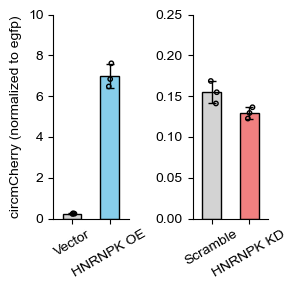

In [6]:
np.random.seed(0)
w = 0.5
fig, axs = plt.subplots(1, 2, figsize=(3, 3), sharey=False)

for i in range(2):
    d = ds[i]
    if i == 0:
        ylim = 10
        colors = ["lightgrey", "skyblue"]
        xticks = ["Vector", "HNRNPK OE"]
    else:
        ylim = 0.25
        colors = ["lightgrey", "lightcoral"]
        xticks = ["Scramble", "HNRNPK KD"]
    pval = ttest_ind(d.iloc[0], d.iloc[1])[1]
    print("P-value:", pval)
    
    plt.sca(axs[i])
    xs = np.arange(len(d))
    plt.bar(xs, d.mean(axis=1), yerr=d.std(axis=1), color=colors, edgecolor="black", width=w, lw=1, error_kw={"capsize": 3, "lw": 1, "capthick": 1})
    for x in range(2):
        for y in d.iloc[x]:
            x1 = x + (np.random.rand() - 0.5) * w * 0.6
            plt.scatter(x1, y, marker="o", s=10, color="none", edgecolor="black", zorder=10)
            
    plt.xticks(xs, xticks, rotation=30, ha="center")
    plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
    plt.ylim(0, ylim)
    for loc in ["top", "right"]:
        plt.gca().spines[loc].set_visible(False)
    if i == 0:
        plt.ylabel(d.index.name)

plt.tight_layout()
plt.savefig("figures/20210914_qPCR_HNRNPK_circmCherry.circmCherry.pdf")
plt.show()
plt.close()

# RT-qPCR of circRNA relative to linear RNA (Figure 4d)

In [3]:
d = pd.read_excel("data/20220805_circRNAseq_qPCR.xlsx")
names = d.values[:,0]
vs1 = d.values[:,1:4].astype("float")
vs2 = d.values[:,4:7].astype("float")

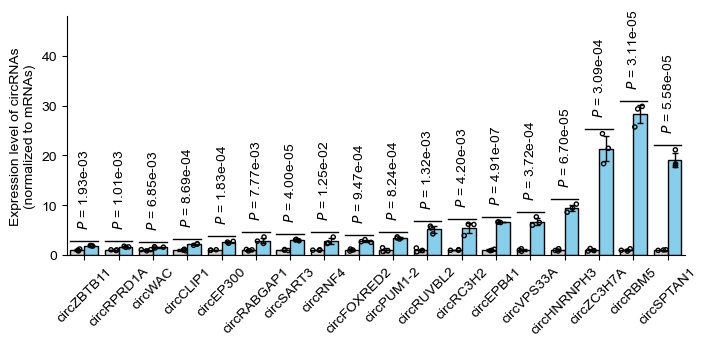

In [4]:
np.random.seed(0)

plt.figure(figsize=(7.2, 3.5))
for i in range(len(vs1)):
    colors = ["lightgrey", "skyblue"]
    for j, vs in enumerate([vs1, vs2]):
        ys = vs[i]
        w = 0.4
        x = i + w * (j-0.5)
        plt.bar(x, np.mean(ys), yerr=np.std(ys), width=w, 
                 color=colors[j], edgecolor="black", lw=1, error_kw={"lw": 1, "capsize": 2})
        for y1 in ys:
           x1 = x + (np.random.random() - 0.5) * w * 0.8
           plt.scatter(x1, y1, marker=".", color="none", edgecolor="black")
    ys1, ys2 = vs1[i], vs2[i]
    ymax = max(max(ys1), max(ys2))
    pval = ttest_ind(ys1, ys2)[1]
    plt.plot([i - w, i + w], [ymax + 1, ymax + 1], lw=1, color="black")
    plt.text(i, ymax + 4, "$\it{P}$ = %.2e" % pval, ha="center", rotation=90)
plt.ylim(0, 48)
plt.yticks(np.arange(0, 41, 10))
plt.ylabel("Expression level of circRNAs\n(normalized to mRNAs)")
xs = np.arange(len(names))
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.xticks(xs, names, rotation=45, ha="center")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/20220805_circRNAseq_qPCR.horizontal.pdf")
plt.show()
plt.close()

# RIP-qPCR measured the abundance of circmCherry (Extended Data Figure 5c)

mCherry2020-11-12 19-36-31.xlsx

/home/zgchen/miniconda3/envs/py3/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


sg-A 0.386163611707526
sg-B 0.047171106794657566
sg-C 0.0497987183876103


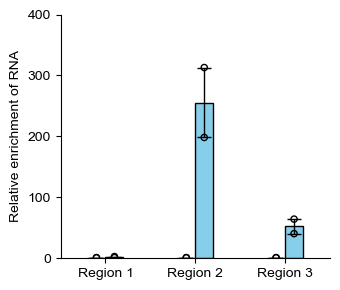

In [3]:
def plot_bar(ax, x, ys, width=0.5, color="C0"):
    ax0 = plt.gca()
    plt.sca(ax)
    plt.bar(x, np.mean(ys), yerr=np.std(ys), width=width, edgecolor="black", color=color, error_kw=dict(capsize=5, lw=1))
    for y1 in ys:
        x1 = x
        plt.scatter(x1, y1, marker="o", s=20, color="none", edgecolor="black", zorder=10)
    plt.sca(ax0)

d = pd.read_excel("data/mCherry2020-11-12 19-36-31.xlsx", index_col=0)
d1 = d[["IgG_R1", "IgG_R2"]]
d2 = d[["Flag_R1", "Flag_R2"]]
for i in range(d1.shape[0]):
    print(d1.index[i], ttest_ind(d1.values[i], d2.values[i])[1])

colors = ["lightgrey", "skyblue"]

w = 0.2
xs = np.arange(d1.shape[0])
plt.figure(figsize=(3.5, 3))
for i, d in enumerate([d1, d2]):
    for x in xs:
        x1 = x + (i - 0.5) * w
        ys = d.values[x]
        plot_bar(plt.gca(), x1, ys, width=w, color=colors[i])
plt.xlim(-0.5, 2.5)
plt.xticks([0, 1, 2], ["Region 1", "Region 2", "Region 3"])
plt.ylabel("Relative enrichment of RNA")
plt.yticks(np.arange(0, 400 + 1, 100))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/mCherry.pdf")
plt.show()
plt.close()

# Expression of circmCherry RNAs (Extended Data Figure 5d)

Vector	FUS-OE	5.0515182000801535e-05
Vector	RBMX-OE	2.295581878114667e-05


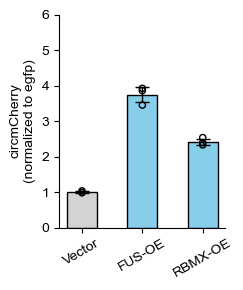

In [4]:
def plot_bar(ax, x, ys, width=0.5, color="C0"):
    ax0 = plt.gca()
    plt.sca(ax)
    plt.bar(x, np.mean(ys), yerr=np.std(ys), width=width, edgecolor="black", color=color, error_kw=dict(capsize=5, lw=1))
    for y1 in ys:
        x1 = x
        plt.scatter(x1, y1, marker="o", s=20, color="none", edgecolor="black", zorder=10)
    plt.sca(ax0)

d = pd.read_excel("data/circmCherry-qPCR-240325.xlsx", sheet_name="Sheet 1", index_col=0)
d = d.head(3)
for i in range(d.shape[0] - 1):
    for j in range(i + 1, d.shape[0]):
        pval = ttest_ind(d.values[i], d.values[j])[1]
        print(d.index[i], d.index[j], pval, sep="\t")
    break
        
xs = np.arange(d.shape[0])
colors = ["lightgrey", "skyblue", "skyblue", "skyblue"]
np.random.seed(0)
plt.figure(figsize=(2.5, 3))
for x, ys in enumerate(d.values):
    plot_bar(plt.gca(), x, ys, width=0.5, color=colors[x])
plt.xticks(xs, d.index, rotation=30)
plt.ylabel("circmCherry\n(normalized to egfp)")
plt.ylim(0, 6)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/circmCherry-qPCR-240325.part1.v2.pdf")
plt.show()
plt.close()

# RNA abundance in the nuclear or cytoplasmic fraction (Extended Data Figure 6a)

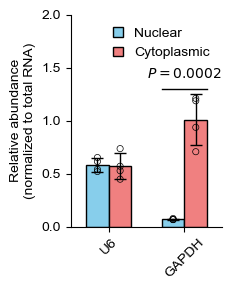

In [5]:
dat = pd.read_excel("data/seperation_efficiency_220805.xlsx", index_col=0)
xs = np.arange(len(dat))
d1 = dat[dat.columns[:4]]
d2 = dat[dat.columns[4:]]

ys1 = d1.mean(axis=1)
yerr1 = d1.std(axis=1)
ys2 = d2.mean(axis=1)
yerr2 = d2.std(axis=1)

vs1 = dat.values[1,:4]
vs2 = dat.values[1,4:]
p = ttest_ind(vs1, vs2)[1]

w = 0.3

plt.figure(figsize=(2.5, 3))

plt.bar(xs - 0.15, ys1, yerr=yerr1, width=w, color="skyblue", edgecolor="black", error_kw={"lw": 1, "capsize": 4}, label="Nuclear")
plt.bar(xs + 0.15, ys2, yerr=yerr2, width=w, color="lightcoral", edgecolor="black", error_kw={"lw": 1, "capsize": 4}, label="Cytoplasmic")

for i, d in enumerate([d1, d2]):
    for j in range(len(d)):
        x = j + (i - 0.5) * w
        for y in d.iloc[j]:
            plt.scatter(x, y, marker="o", s=20, color="none", edgecolor="black", lw=0.5, zorder=10)
            
plt.plot([1 - w, 1 + w], [1.3, 1.3], color="black", lw=1)
plt.text(1, 1.4, "$\it{P} = %.4f$" % p, ha="center")

plt.xticks(xs, ["%s" % gname for gname in dat.index], rotation=45)
plt.ylabel("Relative abundance\n(normalized to total RNA)")
plt.xlim(xs[0] - 0.5, xs[-1] + 0.5)
plt.ylim(0, 2)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(handlelength=0.75, frameon=False)

plt.tight_layout()
plt.savefig("figures/seperation_efficiency_220805.pdf", dpi=300)
plt.show()
plt.close()

# RT-qPCR shows the indicated circRNA abundance in the nuclear or cytoplasmic fraction (Extended Data Figure 6b,c)

nuclear
cytoplasic


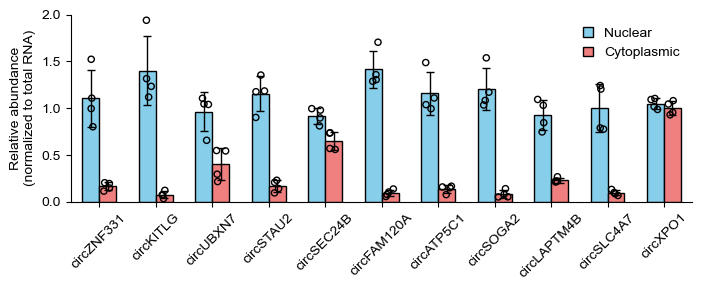

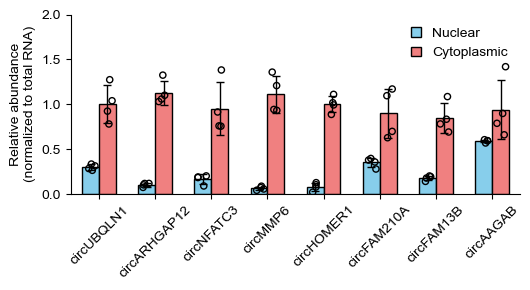

In [6]:
df = pd.read_excel("data/seperation_220803_1.xlsx", sheet_name=None, index_col=0)
w = 0.3
np.random.seed(0)

for name, dat in df.items():
    print(name)
    
    xs = np.arange(len(dat))
    d1 = dat[dat.columns[:4]]
    d2 = dat[dat.columns[4:]]

    ys1 = d1.mean(axis=1)
    yerr1 = d1.std(axis=1)
    ys2 = d2.mean(axis=1)
    yerr2 = d2.std(axis=1)
    
    if name == "nuclear":
        width = 7.2
    else:
        width = 5.5
        
    plt.figure(figsize=(width, 3))

    plt.bar(xs - 0.15, ys1, yerr=yerr1, width=w, color="skyblue", 
            edgecolor="black", error_kw={"lw": 1, "capsize": 3}, label="Nuclear")
    plt.bar(xs + 0.15, ys2, yerr=yerr2, width=w, color="lightcoral", 
            edgecolor="black", error_kw={"lw": 1, "capsize": 3}, label="Cytoplasmic")
    
    for i, d in enumerate([d1, d2]):
        for j in range(len(d)):
            x = j + (i - 0.5) * w
            for y in d.iloc[j]:
                x1 = x + (np.random.rand() - 0.5) * w * 0.6
                plt.scatter(x1, y, marker="o", s=20, color="none", edgecolor="black", lw=1, zorder=10)
                

    plt.xticks(xs, ["circ%s" % gname for gname in dat.index], rotation=45)
    plt.ylabel("Relative abundance\n(normalized to total RNA)")
    plt.xlim(xs[0] - 0.5, xs[-1] + 0.5)
    plt.ylim(0, 2)
    plt.legend(handlelength=0.75, frameon=False)
    
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    plt.tight_layout()
    plt.savefig("figures/%s.pdf" % name, dpi=300)